In [1]:
import pickle
pickle_path = r'C:\Users\Joseph\ml_projects\mouse_move_gan\data\paths_to_right_only.pickle'

with open(pickle_path, 'rb') as fp:
    data = pickle.load(fp)
data['coords'].shape, data['dt'].shape

((21417, 100, 2), (21417, 100, 1))

In [2]:
import os
os.chdir(r'C:\Users\Joseph\ml_projects\mouse_move_gan')
from pymouse_gan.io.preprocessor import Preprocessor
preprocessor = Preprocessor(filter_coords=True, save_dir=r'C:\Users\Joseph\ml_projects\mouse_move_gan\data')
coords_dt = preprocessor.preprocess(data['coords'], data['dt'], dest=[1, 1])
coords_dt.shape

C:\Users\Joseph\ml_projects\mouse_move_gan\pymouse_gan\io\preprocessor.py:130: RuntimeWarning: divide by zero encountered in double_scalars
  x_scale_factor = dest[0] / path[-1][0]
C:\Users\Joseph\ml_projects\mouse_move_gan\pymouse_gan\io\preprocessor.py:137: RuntimeWarning: invalid value encountered in multiply
  path[:, 0] = path[:, 0] * x_scale_factor


Number of Paths with Coords > 1: 9145
Number of Excessive Loops: 2869
Number of Paths with NaN: 441
Number of bad indices: 10454
Saving: C:\Users\Joseph\ml_projects\mouse_move_gan\data\coords_dt.npy


(10963, 100, 3)

In [3]:
import numpy as np
coords_dt = np.load(r'C:\Users\Joseph\ml_projects\mouse_move_gan\data\coords_dt.npy')
coords_dt.shape

(10963, 100, 3)

In [5]:
import os
os.chdir(r'C:\Users\Joseph\ml_projects\mouse_move_gan')
from pymouse_gan.io.preprocessor import Preprocessor
preprocessor = Preprocessor(filter_coords=True, combine_dt=False, save_dir=r'C:\Users\Joseph\ml_projects\mouse_move_gan\data')

with open(pickle_path, 'rb') as fp:
    data = pickle.load(fp)

out = preprocessor.preprocess(data['coords'], data['dt'], dest=[1, 1])
out[0].shape, out[1].shape

Number of Paths with Coords > 1: 9145
Number of Excessive Loops: 2869
Number of Paths with NaN: 441
Number of bad indices: 10454
Saving: C:\Users\Joseph\ml_projects\mouse_move_gan\data\coords.npy
Saving: C:\Users\Joseph\ml_projects\mouse_move_gan\data\dt_arr.npy


((10963, 100, 2), (10963, 100, 1))

In [6]:
coords = np.load(r'C:\Users\Joseph\ml_projects\mouse_move_gan\data\coords.npy')
dt = np.load(r'C:\Users\Joseph\ml_projects\mouse_move_gan\data\dt_arr.npy')
coords.shape, dt.shape

((10963, 100, 2), (10963, 100, 1))

# Exploration / testing

In [15]:
for arr in data['coords']:
    assert arr[0][0] == 0
    assert arr[0][1] == 0

In [25]:
def scale_to_dest(path, dest=[1, 1], verbose=0):
    """Scales a single path to have a specified destination.

    Args:
        path (np.ndarray): a path with shape (100, 2 (or 3))
        verbose (boolean/int): whether or not to print the scale factors
    Returns:
        np.ndarray with the same shape as `path` but with the destination, dest
    """
    x_scale_factor = dest[0] / path[-1][0]
    y_scale_factor = dest[1] / path[-1][1]

    if verbose:
        print(f'X Scale Factor: {x_scale_factor}')
        print(f'Y Scale Factor: {y_scale_factor}')

    path[:, 0] = path[:, 0] * x_scale_factor
    path[:, 1] = path[:, 1] * y_scale_factor

    return path


def scale_coords_uniform_dest(coords, dest=[1, 1]):
    scaled = np.zeros(coords.shape)

    for i, arr in enumerate(coords):
        scaled[i] = scale_to_dest(arr, dest=dest, verbose=0)
    return scaled

In [60]:
out = scale_coords_uniform_dest(data['coords'], dest=[1,1])
out.shape

C:\Users\Joseph\Miniconda3\envs\ml2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Joseph\Miniconda3\envs\ml2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


(21417, 100, 2)

In [61]:
def plot_paths(paths):
    """Utility function to plot to an existing plt.figure.
    """
    for path in paths:
        X = []
        Y = []

        for point in path:
            X.append(point[0])
            Y.append(point[1])

        plt.plot(X, Y)
    return

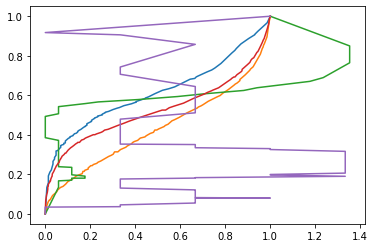

In [62]:
%matplotlib inline
plot_paths(out[:5])

In [56]:
def mode(x):
    values, counts = np.unique(x, return_counts=True)
    m = counts.argmax()
    return values[m], counts[m]
mode(out[4, :, 1])

(0.08027522935779816, 2)

In [58]:
for i, arr in enumerate(out):
    print(i, mode(arr[:, 0]))

0 (0.184931401599406, 4)
1 (0.19061579692245564, 2)
2 (0.058823535814533215, 45)
3 (0.011077541636847248, 2)
4 (0.33332652572402527, 33)
5 (0.006818147635056717, 5)
6 (0.015000001156500025, 2)
7 (0.02605863199326677, 4)
8 (0.9638556395529365, 9)
9 (0.7500007671449533, 28)
10 (0.0054054886366127425, 6)
11 (1.6636361852231552, 14)
12 (4.583332074033404, 20)
13 (0.018867830002801785, 26)
14 (0.04347826813746769, 3)
15 (0.009671209856551252, 4)
16 (0.7804878666436657, 6)
17 (0.31935472104057483, 6)
18 (0.023255466810172324, 7)
19 (0.006768190199837295, 2)
20 (0.01260504150865055, 5)
21 (0.0, 2)
22 (0.14746530679982878, 2)
23 (0.2487046840213701, 4)
24 (0.0, 23)
25 (0.535031916782022, 4)
26 (0.13422820185240364, 3)
27 (0.4477611449771462, 4)
28 (0.015471168736444187, 2)
29 (0.0, 7)


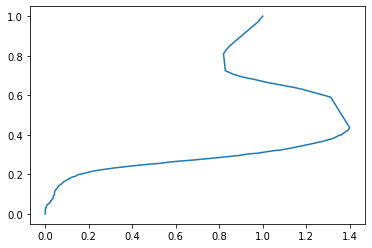

In [59]:
i = 29
plot_paths(out[i:i+1])

In [85]:
bad_coords = np.unique(np.where(out > 1)[0])
bad_coords.shape

(9145,)

In [78]:
# all_idx = np.arange(out.shape[0])
all_idx = list(range(out.shape[0]))
for bad_idx in bad_coords[0]:
    bad_idx = int(bad_idx)
    if bad_idx in all_idx:
        all_idx.remove(bad_idx)

In [79]:
len(all_idx)

12272

In [81]:
(out.shape[0] - bad_coords[0].shape[0]) == len(all_idx)

True

In [82]:
bad_coords[0]

array([    2,     4,     9, ..., 21411, 21415, 21416], dtype=int64)

In [83]:
np.where(out < 0)[0].shape

(0,)

In [86]:
def filter_out_oob_paths(paths):
    """Filter out paths that have values > 1.
    """
    bad_coords = np.unique(np.where(paths > 1)[0])

    all_idx = list(range(paths.shape[0]))
    for bad_idx in bad_coords:
        bad_idx = int(bad_idx)
        if bad_idx in all_idx:
            all_idx.remove(bad_idx)
    assert (paths.shape[0] - bad_coords.shape[0]) == len(all_idx)
    return paths[all_idx]

In [93]:
filtered = filter_out_oob_paths(out)
filtered.shape

(12272, 100, 2)

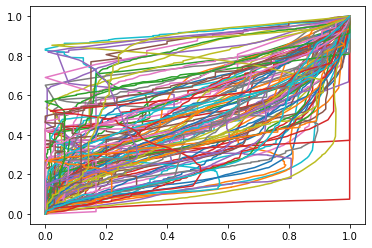

In [88]:
plot_paths(filtered[:100])

In [118]:
bad_coords = []
for i, arr in enumerate(filtered):
    if mode(arr[:, 0])[1] >= 30:
        bad_coords.append(i)

In [119]:
bad_coords[:8]

[43, 63, 65, 66, 85, 86, 87, 95]

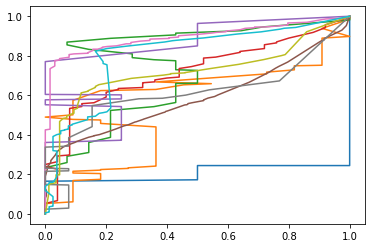

In [120]:
i = 50
delta = 10
plot_paths([filtered[coord] for coord in bad_coords[i:i+delta]])

In [ ]:
# ecessive loops when
# the number of repeat x values > 40


In [113]:
def mode(x):
    values, counts = np.unique(x, return_counts=True)
    m = counts.argmax()
    return values[m], counts[m]

def filter_out_excessive_loops_paths(paths):
    """Filter out paths that have values > 1.
    
    Problem: Also removes a lot of paths that go straight up
    """
    bad_coords = []
    for i, arr in enumerate(paths):
        if mode(arr[:, 0])[1] >= 30:
            bad_coords.append(i)
    print(f'Number of Excessive Loops: {len(bad_coords)}')

    all_idx = list(range(paths.shape[0]))
    for bad_idx in bad_coords:
        bad_idx = int(bad_idx)
        if bad_idx in all_idx:
            all_idx.remove(bad_idx)
    assert (paths.shape[0] - len(bad_coords)) == len(all_idx)
    return paths[all_idx]

In [114]:
filtered2 = filter_out_excessive_loops_paths(filtered)
filtered2.shape

Number of Excessive Loops: 1283


(10989, 100, 2)

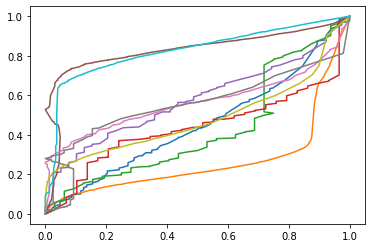

In [140]:
i = 200
delta = 10
plot_paths(filtered2[i:i+delta])
